All data in notebook are obtained by running the `powerTransform.py` script in this directory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
path_to_mavenn = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/'
sys.path.insert(0, path_to_mavenn)

# Load mavenn
import mavenn

In [3]:
# Download mpsa dataset from master branch
url = 'https://github.com/jbkinney/mavenn/blob/master/mavenn/examples/datasets/mpsa_data.csv.gz?raw=true'

data_df = pd.read_csv(url,  
                      compression='gzip',
                      index_col=[0])

data_df = data_df.reset_index().copy()

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,078
training + validation N: 24,405


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,193,15,-0.074999,UUCGCGCCA
2,training,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,216,6,-0.482679,GGUGUCUGU
6,validation,88,4,-0.241737,CAGGCAAAC
7,training,14,0,-0.167408,CAUGCAGCU
8,training,170,14,-0.048222,CAAGUCACU
9,training,242,13,-0.230795,UCCGCGCUA


In [4]:
MPSA_WT = 'CAGGUAAGU'

In [5]:
x_train = data_df['x'].values
y_train = data_df['y'].values

x_test = test_df['x'].values
y_test = test_df['y'].values

In [33]:
yadd = np.loadtxt('yadd.txt')
yobs = np.loadtxt('yobs.txt')
y_hat_on_test_SH_powerlaw = np.loadtxt('y_hat_on_test_SH_powerlaw.txt')
phi_SH = np.loadtxt('phi_SH.txt')
y_add_range_SH = np.loadtxt('y_add_range_SH.txt')
y_obs_range_SH = np.loadtxt('y_obs_range_SH.txt')


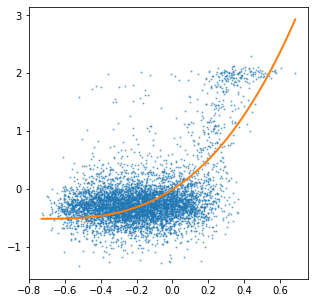

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(phi_SH,y_test,s=1,alpha=0.5,color='C0')
plt.plot(y_add_range_SH,y_obs_range_SH,color='C1',lw=2)


In [40]:
mean_phi_SH = np.mean(phi_SH)
std_phi_SH = np.std(phi_SH)

In [41]:
phi_SH_fixed = (phi_SH - mean_phi_SH)/std_phi_SH

Text(0, 0.5, 'y (test)')

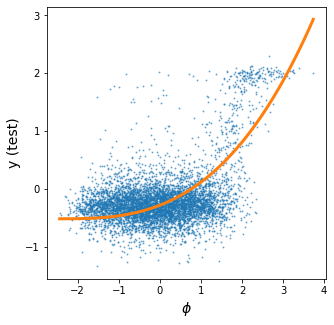

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(phi_SH_fixed,y_test,s=1,alpha=0.5,color='C0')
plt.plot((y_add_range_SH-mean_phi_SH)/std_phi_SH,y_obs_range_SH,color='C1',lw=3)
plt.xlabel('$\phi$',fontsize=14)
plt.ylabel('y (test)',fontsize=14)
